## Q1


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
class Line:
    a=None
    b=None
    c=None
    pt1 =None
    pt2 = None
    def __init__(self,*args):
        if(len(args)==3):
            self.a= args[0]
            self.b = args[1]
            self.c = args[2]
        elif(len(args)==2):
            pt1 = args[0]
            pt2 = args[1]
            self.pt1 = pt1
            self.pt2 = pt2
            self.a=pt1[1]-pt2[1]
            self.b = pt2[0]-pt1[0]
            self.c = (pt2[1]-pt1[1])*pt1[0]-pt1[1]*(pt2[0]-pt1[0])  

    def disFromPt(self,pt):
        return abs(self.a*pt[0]+self.b*pt[1]+self.c)/((self.a**2+self.b**2)**0.5)
    def isInlier(self,pt,t):
        
        return self.disFromPt(pt)<=t
    def getInliers(self,t,pts):
        inlierInds = []
        for i in range(len(pts)):
            if(self.isInlier(pts[i],t)):
                inlierInds.append(i)
        return inlierInds
    def func(self,x):
        m = -self.a/self.b
        c = -self.c/self.b

        return m*x+c 
    def plot(self,axis):
        axis.plot([-12,12],[self.func(-12),self.func(12)])
    
        




    def __str__(self):
        return "{}x + {}y + {} = 0".format(self.a,self.b,self.c)

 


class Circle:
    f = None
    g = None
    c = None
    valid = True
    def __init__(self,*args):
        if(len(args)==1):
            pt1 = args[0][0]
            pt2 = args[0][1]
            pt3 = args[0][2]
            self.findCircle(pt1[0],pt1[1],pt2[0],pt2[1],pt3[0],pt3[1])
        if(len(args)==3):
            self.f = args[0]
            self.g = args[1]
            self.c = args[2]
        elif len(args)==2:
            self.f = args[0][0]
            self.g = args[0][1]
            self.c = (-args[1]**2+(self.f)**2+(self.g)**2)
    def disFromPt(self,pt):
        return abs(((pt[0]+self.g)**2+(pt[1]+self.f)**2)**0.5-(self.f**2+self.g**2-self.c)**0.5)
    def isInlier(self,pt,t):
        
        return self.disFromPt(pt)<=t
    def isValid(self):
        if(not self.valid):
            return False
        if(abs(self.f)>12 or abs(self.g)>12):
            return False
        return True
    def getInliers(self,t,pts):
        inlierInds = []
        for i in range(len(pts)):
            if(self.isInlier(pts[i],t)):
                inlierInds.append(i)
        return inlierInds
    def plot(self,ax,color='r'):
        ax.add_patch(plt.Circle((-self.g, -self.f), (self.f**2+self.g**2-self.c)**0.5, color=color,fill=False))
    def findCircle(self,x1, y1, x2, y2, x3, y3) :
        x12 = x1 - x2
        x13 = x1 - x3
    
        y12 = y1 - y2
        y13 = y1 - y3
    
        y31 = y3 - y1
        y21 = y2 - y1
    
        x31 = x3 - x1
        x21 = x2 - x1
    
        # x1^2 - x3^2
        sx13 = pow(x1, 2) - pow(x3, 2)
        # y1^2 - y3^2
        sy13 = pow(y1, 2) - pow(y3, 2)
        sx21 = pow(x2, 2) - pow(x1, 2)
        sy21 = pow(y2, 2) - pow(y1, 2)
        if(int((y31) * (x12) - (y21) * (x13))==0):
            self.valid = False
            return
        if(int((x31) * (y12) - (x21) * (y13))==0):
            self.valid = False
            return
        
        self.f = (((sx13) * (x12) + (sy13) *(x12) + (sx21) * (x13) +(sy21) * (x13)) / (2 *((y31) * (x12) - (y21) * (x13))))
                
        self.g = (((sx13) * (y12) + (sy13) * (y12) + (sx21) * (y13) + (sy21) * (y13)) /(2 * ((x31) * (y12) - (x21) * (y13))))
    
        self.c = (-pow(x1, 2) - pow(y1, 2) - 2 *self.g * x1 - 2 * self.f * y1)
    
        # eqn of circle be x^2 + y^2 + 2*g*x + 2*f*y + c = 0
        # where centre is (h = -g, k = -f) and
        # radius r as r^2 = h^2 + k^2 - c
    
    def __str__(self):
        return "x^2 + y^2 + {}x + {}y + {} = 0".format(self.f*2,self.g*2,self.c)
    
def RANSAC(X,t,thres,size=2,bestFit = False):
    if size==3:
        while True:
            ran_choice = np.random.choice(len(X),size=3)
            ran_pts = X[ran_choice] 
            c = Circle(ran_pts)
            if(not c.isValid()):
                continue
            inls = c.getInliers(t,X) 
            if len(inls)>=thres:
                

                
                maxInliers = inls
                maxCouple = ran_choice
                
                circle =c
                if(not bestFit):
                    return circle,maxInliers,maxCouple
                couples = combinations(inls, 3)
                for couple in couples:
                    
                    c = Circle([X[couple[0]],X[couple[1]],X[couple[2]]])
                    if(not c.isValid()):
                        continue
                    inls = c.getInliers(t,X)
                    if(len(inls)>len(maxInliers)):
                        maxInliers = inls
                        maxCouple = list(couple)
                        circle = c
            
                return circle,maxInliers,maxCouple
        

    while True:
        ran_choice = np.random.choice(len(X),size=2)
        ran_pts = X[ran_choice] 
        l = Line(ran_pts[0],ran_pts[1])
        inls = l.getInliers(t,X) 
        if len(inls)>=thres:
            
            couples = combinations(inls, 2)
            maxInliers = inls
            maxCouple = ran_choice
            
            line =l
            # return line,maxInliers,maxCouple
            for couple in couples:
                
                l = Line(X[couple[0]],X[couple[1]])
                inls = l.getInliers(t,X)
                if(len(inls)>len(maxInliers)):
                    maxInliers = inls
                    maxCouple = list(couple)
                    line = l
        
            return line,maxInliers,maxCouple
        




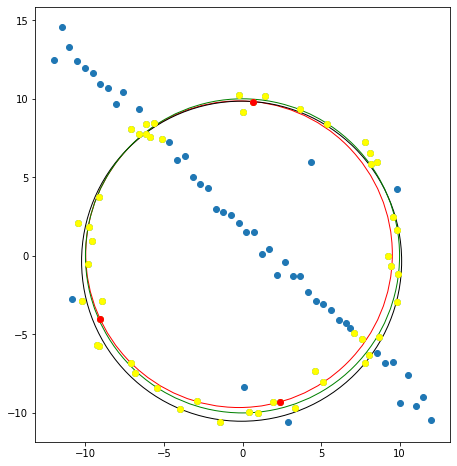

In [53]:
N = 100
N_half = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, N_half)
n = s*np.random.randn(N_half)
x, y = (r+n)*np.cos(t), (r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(N_half, 1), y.reshape(N_half, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, N_half)
y = m*x +b + s*np.random.randn(N_half)
real_c = Circle([0,0],r)
X_line = np.hstack((x.reshape(N_half, 1), y.reshape(N_half, 1)))
#print(X_line)
X = np.vstack((X_circ, X_line))
x_val = X[:,0]
y_val = X[:,1]
pts = X[np.random.choice(len(X),size=2)] 

fig,ax=plt.subplots(figsize=(8,8))
ax.set_aspect( 1 )
ax.scatter(x_val,y_val)

# ran_choice = np.random.choice(len(X),size=3)
# ran_pts = X[ran_choice] 
# ax.scatter(ran_pts[:,0],ran_pts[:,1],color='yellow')
circl,inls,cpl = RANSAC(X,1,50,size =3)

circl.plot(ax)
bestc,bestinls,bestcpl = RANSAC(X,1,50,size =3,bestFit=True)

bestc.plot(ax,color='black')
real_c.plot(ax,color='green')


# print(inls)
ax.scatter(X[inls][:,0],X[inls][:,1],color='yellow')
ax.scatter(X[cpl][:,0],X[cpl][:,1],color='red')

In [120]:
import cv2
import numpy as np
# function to display the coordinates of
# of the points clicked on the image
selectedPoints = []
def blendImage(img,points):
    flag = cv2.imread('flag.png', 1)
    fh = flag.shape[0]
    fw = flag.shape[1]
    imh = img.shape[0]
    imw = img.shape[1]
    print(points)
    pts2 = np.float32(points)
    pts1 = np.float32([[0, 0], [fw, 0],
                       [0, fh], [fw, fh]])
    h , status = cv.findHomography(pts1, pts2,cv.RANSAC, 5.0)
    # Apply Perspective Transform Algorithm
    # matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(flag, h, (imw, imh))
    cv2.addWeighted(img,1,result,0.5,0.2,result)
    cv2.imshow('image',result)


def click_event(event, x, y, flags, params):
        # checking for left mouse clicks
        if event == cv2.EVENT_LBUTTONDOWN:
            # displaying the coordinates
            # on the Shell
        
            if(len(selectedPoints)==4):
                blendImage(img,selectedPoints)
                print("Selected")
            elif len(selectedPoints)<4:
                selectedPoints.append([x,y])
                print(x, ' ', y)
                cv2.circle(drawImg,(x,y),radius=5,color=(255, 0, 0), thickness=-1)
                cv2.imshow('image', drawImg)
 
    # checking for right mouse clicks    


img = cv2.imread('001.jpg', 1)
drawImg = img.copy()
cv2.imshow('image', img)
cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()
 

194   221
505   286
181   399
498   422
[[194, 221], [505, 286], [181, 399], [498, 422]]
Selected


In [179]:

def geometricDistance(pt1,pt2, h):

    p1 = np.transpose(np.matrix([pt1[0], pt1[1], 1]))
    estimatep2 = np.dot(h, p1)
    estimatep2 = (1/estimatep2.item(2))*estimatep2
    p2 = np.transpose(np.matrix([pt2[2], pt2[3], 1]))
    error = p2 - estimatep2
    return np.linalg.norm(error)
def calculateHomography(pts1,pts2):
    #loop through correspondences and create assemble matrix
    aList = []
    for i in range(len(pts1)):
        p1 = np.matrix([pts1[i][0], pts1[i][1], 1])
        p2 = np.matrix([pts2[i][0], pts2[i][1], 1])

        a2 = [0, 0, 0, -p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2),
              p2.item(1) * p1.item(0), p2.item(1) * p1.item(1), p2.item(1) * p1.item(2)]
        a1 = [-p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2), 0, 0, 0,
              p2.item(0) * p1.item(0), p2.item(0) * p1.item(1), p2.item(0) * p1.item(2)]
        aList.append(a1)
        aList.append(a2)

    matrixA = np.matrix(aList)

    #svd composition
    u, s, v = np.linalg.svd(matrixA)

    #reshape the min singular value into a 3 by 3 matrix
    h = np.reshape(v[8], (3, 3))

    #normalize and now we have h
    h = (1/h.item(8)) * h
    return h

# def RANSAC_1():


[[ 8.7976964e-01  3.1245438e-01 -3.9430589e+01]
 [-1.8389418e-01  9.3847198e-01  1.5315784e+02]
 [ 1.9641425e-04 -1.6015275e-05  1.0000000e+00]]
[[355.09185791015625, 15.144149780273438], [230.06825256347656, 231.07986450195312], [489.34014892578125, 561.9087524414062], [64.42530059814453, 189.85447692871094]]
[[ 8.68012757e-01  3.12305197e-01 -3.85125226e+01]
 [-1.95533984e-01  9.27680517e-01  1.56250726e+02]
 [ 1.54760089e-04 -5.46510664e-06  1.00000000e+00]]


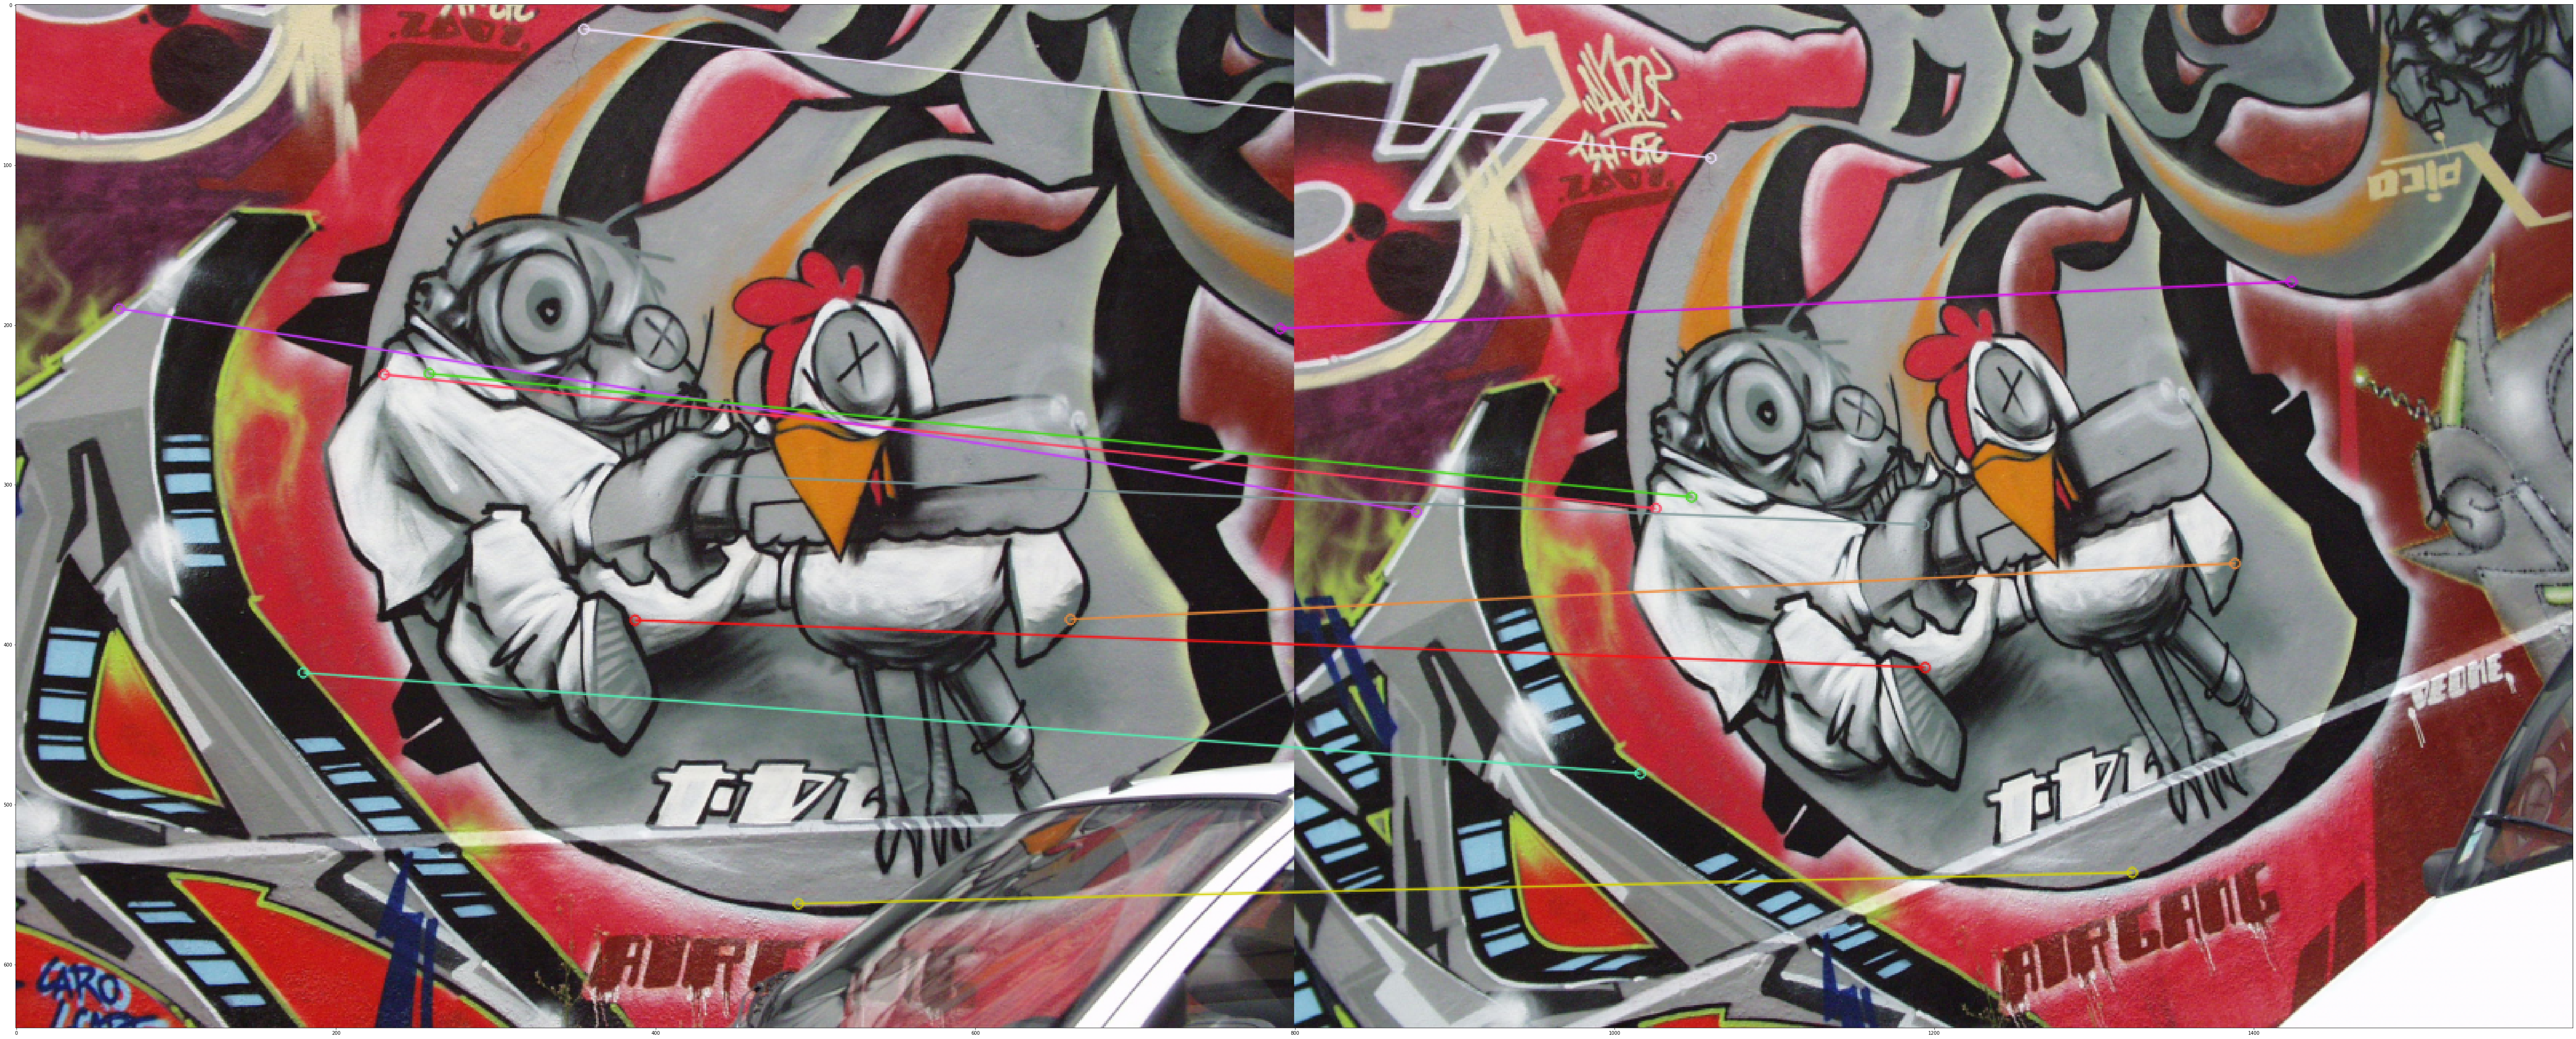

In [181]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('img1.ppm')       
img2 = cv.imread('img2.ppm') 
given_H = np.loadtxt('H1to2p')
print(given_H)

sift = cv.SIFT_create(nfeatures=0,nOctaveLayers=3,contrastThreshold=0.04,edgeThreshold=10,sigma=1.6)
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# imgtest=cv2.drawKeypoints(img1.copy() ,
#                       kp1 ,
#                       img2.copy() ,
#                       flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv.imshow('test',imgtest)
#bf = cv.BFMatcher()
bf = cv.BFMatcher(cv.NORM_L1, crossCheck = True)
matches = bf.match(des1, des2)
sortedmatches = sorted(matches, key = lambda x:x.distance)
count = 0
# for m,n in matches:
#     if m.distance < 0.75*n.distance:
#         if count%1==0: # only 100 matches from 1000 matches will be added to matchesArr
#             matchesArr.append([m]) 
#         count+=1
pts1 = [[i for i in kp1[sortedmatches[j].queryIdx].pt] for j in range(4)]
pts2 = [[i for i in kp2[sortedmatches[j].trainIdx].pt] for j in range(4)]
print(pts1)
# h , status = cv.findHomography(np.float32(pts1), np.float32(pts2),cv.RANSAC, 5.0)
# print(h)
h = calculateHomography(pts1,pts2)
print(h)
dst = cv.warpPerspective(img2, np.linalg.inv(h), ((img2.shape[1] + img1.shape[1]), img1.shape[0]))
dst[0:img1.shape[0], 0:img1.shape[1]] = img1
cv.imshow('joint',dst)
# pts1 = [[int(i) for i in kp1[sortedmatches[j].queryIdx].pt] for j in range(4,8)]
# pts2 = [[int(i) for i in kp2[sortedmatches[j].trainIdx].pt] for j in range(4,8)]
# h , status = cv.findHomography(np.float32(pts1), np.float32(pts2),cv.RANSAC, 5.0)
# print(h)
# pt1 = [int(i) for i in kp1[sortedmatches[0].queryIdx].pt]
# pt2 = [int(i) for i in kp2[sortedmatches[0].trainIdx].pt]


img3 = cv.drawMatches(img1,kp1,img2,kp2,sortedmatches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# (H, status) = cv.findHomography(pts1, pts2, cv.RANSAC)

fig,ax = plt.subplots(1,figsize = (160,40))
# cv.imshow('image',img3)


ax.imshow(cv.cvtColor(img3,cv.COLOR_BGR2RGB)),plt.show()
# cv2.imshow('image',img1)
# cv2.imshow('image2',img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

